In [1]:
import pandas as pd
#import numpy as np
import numpy as np
#import pandas as pd
#from sklearn.cross_validation import train_test_split
from tqdm import tqdm
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

train = pd.read_csv("train.csv")

In [3]:
data_restrict = train.iloc[1:,:]

In [4]:
#data_restrict
means = data_restrict.mean()[1:]

In [6]:
means

tag00      2.238750
tag01    313.329325
tag04      0.033366
tag05      0.089746
tag06      0.040025
tag07    284.633259
tag08      0.112196
tag09      0.137761
tag10      2.243920
tag11      0.036270
tag12      0.024551
tag13      6.845111
tag02    329.737995
tag15      0.626896
tag16      0.432899
tag17    100.245507
tag18      0.089746
dtype: float64

In [9]:
#mean = data_restrict.iloc[:,1:].mean()
stds = data_restrict.std()[1:]


In [10]:
time = data_restrict["Time"]
data_restrict.drop("Time",axis=1,inplace=True)

/home/elyha7/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
data_restrict = data_restrict - means#/ std

In [12]:
stds[0]

0.41038740456411088

In [13]:
i=0
for name in data_restrict.columns:
    data_restrict[name] = np.array(data_restrict[name])/stds[i]
    i+=1

In [15]:
train = data_restrict

In [16]:
len(train)

1535117

In [17]:
train.head()

,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
1,-5.455211,-2.426147,-0.185788,-0.098084,-0.20419,-0.205461,-0.355492,-0.399714,-0.355492,-0.193996,-0.024475,-1.735077,-12.648347,-1.29623,-1.446566,-0.024475,-0.098084
2,-5.455211,-2.426147,-0.185788,-0.098084,-0.20419,-0.205461,-0.355492,-0.399714,-0.355492,-0.193996,-0.024475,-1.735077,-12.648347,-1.29623,-1.446566,-0.024475,-0.098084
3,-5.455211,-2.426147,-0.185788,-0.098084,-0.20419,-0.205461,-0.355492,-0.399714,-0.355492,-0.193996,-0.024475,-1.735077,-12.648347,-1.29623,-1.446566,-0.024475,-0.098084
4,-5.455211,-2.426147,-0.185788,-0.098084,-0.20419,-0.205461,-0.355492,-0.399714,-0.355492,-0.193996,-0.024475,-1.735077,-12.648347,-1.29623,-1.446566,-0.024475,-0.098084
5,-5.455211,-2.426147,-0.185788,-0.098084,-0.20419,-0.205461,-0.355492,-0.399714,-0.355492,-0.193996,-0.024475,-1.735077,-12.648347,-1.29623,-1.446566,-0.024475,-0.098084


In [18]:
train.describe()

,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
count,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06,1.535117e+06
mean,-1.820890e-12,3.333664e-14,2.044937e-13,-1.372793e-13,-2.157586e-15,-3.122626e-12,-3.705574e-14,-1.589051e-14,5.091311e-14,1.593825e-14,5.454371e-14,-1.171830e-13,1.006472e-12,-1.960457e-14,1.468254e-13,-2.969877e-13,-1.372793e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.455211e+00,-2.435529e+00,-1.857880e-01,-2.885053e+00,-2.041904e-01,-1.337647e+00,-3.554922e-01,-3.997135e-01,-3.554922e-01,-1.939962e-01,-3.226343e+00,-1.735077e+00,-1.264835e+01,-1.296230e+00,-1.446566e+00,-3.226343e+00,-2.885053e+00
25%,-7.088380e-01,-8.589787e-01,-1.857880e-01,-7.220648e-01,-2.041904e-01,-9.236963e-01,-3.554922e-01,-3.997135e-01,-3.554922e-01,-1.939962e-01,-6.676235e-01,-8.647258e-01,9.236822e-02,-1.296230e+00,-1.446566e+00,-6.676237e-01,-7.220648e-01
50%,1.520872e-01,8.918790e-02,-1.857880e-01,5.224157e-02,-2.041904e-01,-3.243093e-02,-3.554922e-01,-3.997135e-01,-3.554922e-01,-1.939962e-01,-1.330934e-02,1.406925e-02,1.129136e-01,7.714672e-01,7.261151e-01,-1.330969e-02,5.224157e-02
75%,9.399855e-01,9.302932e-01,-1.857880e-01,7.449981e-01,-2.041904e-01,7.649693e-01,-3.554922e-01,-3.997135e-01,-3.554922e-01,-1.939962e-01,6.593813e-01,8.738749e-01,1.214469e-01,7.714672e-01,7.261151e-01,6.593810e-01,7.449981e-01
max,1.123939e+00,1.431542e+00,5.382474e+00,2.167701e+00,4.897386e+00,2.402572e+00,2.813000e+00,2.501790e+00,2.813000e+00,5.154738e+00,3.471904e+00,1.723579e+00,1.262013e-01,7.714672e-01,7.261151e-01,3.471904e+00,2.167701e+00


In [19]:
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from keras.models import Sequential
from keras import callbacks


__date__ = '2016-07-22'


def make_timeseries_regressor(window_size, filter_length, nb_input_series=1, nb_outputs=1, nb_filter=4):
    """:Return: a Keras Model for predicting the next value in a timeseries given a fixed-size lookback window of previous values.
    The model can handle multiple input timeseries (`nb_input_series`) and multiple prediction targets (`nb_outputs`).
    :param int window_size: The number of previous timeseries values to use as input features.  Also called lag or lookback.
    :param int nb_input_series: The number of input timeseries; 1 for a single timeseries.
      The `X` input to ``fit()`` should be an array of shape ``(n_instances, window_size, nb_input_series)``; each instance is
      a 2D array of shape ``(window_size, nb_input_series)``.  For example, for `window_size` = 3 and `nb_input_series` = 1 (a
      single timeseries), one instance could be ``[[0], [1], [2]]``. See ``make_timeseries_instances()``.
    :param int nb_outputs: The output dimension, often equal to the number of inputs.
      For each input instance (array with shape ``(window_size, nb_input_series)``), the output is a vector of size `nb_outputs`,
      usually the value(s) predicted to come after the last value in that input instance, i.e., the next value
      in the sequence. The `y` input to ``fit()`` should be an array of shape ``(n_instances, nb_outputs)``.
    :param int filter_length: the size (along the `window_size` dimension) of the sliding window that gets convolved with
      each position along each instance. The difference between 1D and 2D convolution is that a 1D filter's "height" is fixed
      to the number of input timeseries (its "width" being `filter_length`), and it can only slide along the window
      dimension.  This is useful as generally the input timeseries have no spatial/ordinal relationship, so it's not
      meaningful to look for patterns that are invariant with respect to subsets of the timeseries.
    :param int nb_filter: The number of different filters to learn (roughly, input patterns to recognize).
    """
    model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(nb_outputs, activation='linear'),     # For binary classification, change the activation to 'sigmoid'
    ))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # To perform (binary) classification instead:
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model


def make_timeseries_instances(timeseries, window_size):
    """Make input features and prediction targets from a `timeseries` for use in machine learning.
    :return: A tuple of `(X, y, q)`.  `X` are the inputs to a predictor, a 3D ndarray with shape
      ``(timeseries.shape[0] - window_size, window_size, timeseries.shape[1] or 1)``.  For each row of `X`, the
      corresponding row of `y` is the next value in the timeseries.  The `q` or query is the last instance, what you would use
      to predict a hypothetical next (unprovided) value in the `timeseries`.
    :param ndarray timeseries: Either a simple vector, or a matrix of shape ``(timestep, series_num)``, i.e., time is axis 0 (the
      row) and the series is axis 1 (the column).
    :param int window_size: The number of samples to use as input prediction features (also called the lag or lookback).
    """
    timeseries = np.asarray(timeseries)
    assert 0 < window_size < timeseries.shape[0]
    X = np.atleast_3d(np.array([timeseries[start:start + window_size] for start in range(0, timeseries.shape[0] - window_size)]))
    y = timeseries[window_size:]
    q = np.atleast_3d([timeseries[-window_size:]])
    return X, y, q


def evaluate_timeseries(X, y, window_size, model):
    """Create a 1D CNN regressor to predict the next value in a `timeseries` using the preceding `window_size` elements
    as input features and evaluate its performance.
    :param ndarray timeseries: Timeseries data with time increasing down the rows (the leading dimension/axis).
    :param int window_size: The number of previous timeseries values to use to predict the next.
    """
    #filter_length = 5
    #nb_filter = 4
    #timeseries = np.atleast_2d(timeseries)
    #if timeseries.shape[0] == 1:
    #    timeseries = timeseries.T       # Convert 1D vectors to 2D column vectors

    #nb_samples, nb_series = timeseries.shape
    #print('\n\nTimeseries ({} samples by {} series):\n'.format(nb_samples, nb_series), timeseries)
    #model = make_timeseries_regressor(window_size=window_size, filter_length=filter_length, nb_input_series=nb_series, nb_outputs=nb_series, nb_filter=nb_filter)
    #print('\n\nModel with input size {}, output size {}, {} conv filters of length {}'.format(model.input_shape, model.output_shape, nb_filter, filter_length))
    #model.summary()
    nb_samples = len(X)
    nb_series = 1
    #X, y, q = make_timeseries_instances(timeseries, window_size)
    #print('\n\nInput features:', X, '\n\nOutput labels:', y, '\n\nQuery vector:', q, sep='\n')
    test_size = int(0.01 * nb_samples)           # In real life you'd want to use 0.2 - 0.5
    X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
    
    #early_stop_cbk = callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='min')
    #,callbacks = [early_stop_cbk],, validation_data=(X_test, y_test)
    val_loss=0
    val_loss_old=np.inf
    count=0
    patience=10
    for epochnum in range(25):
        model.fit(X_train, y_train, nb_epoch=1, batch_size=400)
        
        val_loss,val_error = model.evaluate(X_test,y_test)
        print("VAL_LOSS",val_loss)
        print("VAL_ERROR",val_error)
        if (val_loss > val_loss_old) and (val_loss < 50 or val_loss_old < 50):
            count+=1
            if count >= patience:
                print("EXIT: loss = ",val_loss,"loss_old = ",val_loss_old)
                break
        else:
            count=0
            model.save_weights(str(window_size)+"_"+str(val_loss)+"weights.h5")
        val_loss_old = val_loss
        
        
    model.save_weights("end_weights.h5")
    
    print("Finished training")
    pred = model.predict(X_test)
    #print('\n\nactual', 'predicted', sep='\t')
    #for actual, predicted in zip(y_test, pred.squeeze()):
        #print(actual.squeeze(), predicted, sep='\t')
    #print('next', model.predict(q).squeeze(), sep='\t')
        
    return model

Using TensorFlow backend.


In [20]:
regressor = make_timeseries_regressor(300,5)

/home/elyha7/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(300, 1), filters=4, kernel_size=5)`
/home/elyha7/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", kernel_size=5, filters=4)`


In [21]:
X,y,q = make_timeseries_instances(np.array(list(train["tag01"])),300)

In [22]:
len(X)

1534817

In [ ]:
regressor_fitted = evaluate_timeseries(X,y,300,regressor)

In [28]:
nb_samples = len(X)
nb_series = 1
#X, y, q = make_timeseries_instances(timeseries, window_size)
#print('\n\nInput features:', X, '\n\nOutput labels:', y, '\n\nQuery vector:', q, sep='\n')
test_size = int(0.01 * nb_samples)           # In real life you'd want to use 0.2 - 0.5
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

In [31]:
regressor.load_weights("300_2.33737678324e-05weights.h5")
regressor.evaluate(X_test,y_test)

15296/15348 [============================>.] - ETA: 0s

[2.3373767832391596e-05, 0.0024124082545721932]

In [32]:
def get_predict(regressor_fitted,start = 0,end = 400,tag="tag01",window_size=200,train=train,thresh = 0.05):
    #next_one = regressor_fitted.predict((train[tag][start:start+window_size]).reshape(-1,window_size,1))
    next_arr = []#[next_one[0][0]]
    next_arr_auto = []
    for tick in range(0,end-window_size-start):
        #print(len(next_arr[:-200]))
        #print(tick)
        #print(list(train[tag])[tick:window_size])
        #print(train[tag][start+tick:window_size])
        #print(len(np.array(list(train[tag][start+tick:start+window_size])+list(next_arr[:-200]))))
        #print(np.array(list(train[tag][start+tick:start+window_size])+list(next_arr_auto[-window_size:])))
        next_arr.append(regressor_fitted.predict(train[tag][start+tick:start+tick+window_size].reshape(-1,window_size,1))[0][0])
        #next_arr_auto.append(
        next_one = (regressor_fitted.predict(np.array(list(train[tag][start+tick:start+window_size])+list(next_arr_auto[-window_size:])).reshape(-1,window_size,1))[0][0])
        if len(next_arr_auto):
            if (next_one - next_arr_auto[-1]) < thresh:
                next_one = next_arr_auto[-1]
        next_arr_auto.append(next_one)
    return next_arr,next_arr_auto

In [33]:
preds,auto_preds = get_predict(regressor,tag="tag01",train=train,start=1000000,end=1020000,window_size=300,thresh=0.01)

/home/elyha7/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


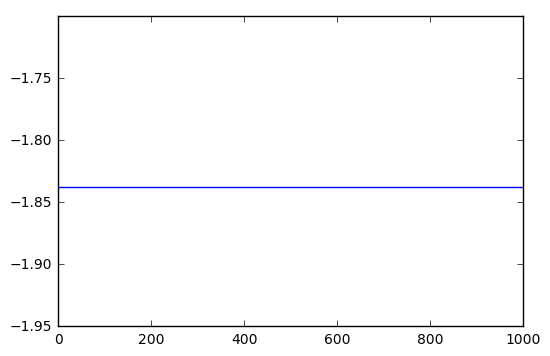

In [43]:
plt.plot(auto_preds[:1000])

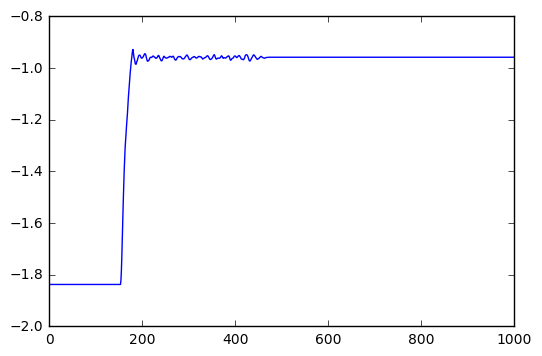

In [42]:
plt.plot(preds[:1000])

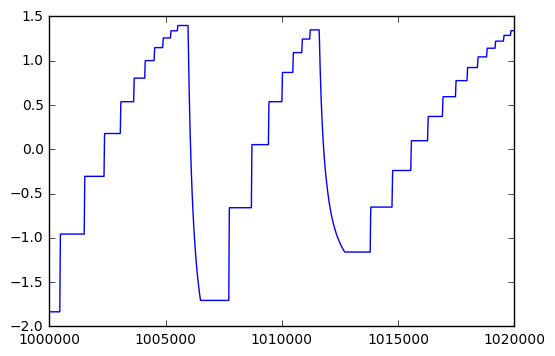

In [35]:
plt.plot(train["tag01"][1000000:1020000])

In [ ]:
#under construction
testfolder = "kaspersky_hackathon_1/test"
tag = "tag01"
for testfile in os.listdir(testfolder):
    curr = pd.read_csv(testfolder+'/'+testfile)
    preds,auto_preds = get_predict(regressor_fitted,tag=tag,train=curr,start=0,end=len(curr),window_size=300,thresh=0.01)

In [ ]:
#under construction
curr = pd.read_csv(testfolder+'/'+"00_test.csv")
preds,auto_preds = get_predict(regressor_fitted,tag="tag01",train=curr,start=0,end=len(curr),window_size=300,thresh=0.01)
